In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('bmh')
import seaborn as sns
import os
##prueba

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
df_titanic = sns.load_dataset("titanic")
df_titanic.head(200)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,1,female,58.0,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
196,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
197,0,3,male,42.0,0,1,8.4042,S,Third,man,True,NaN,Southampton,no,False
198,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True


In [ ]:
df_titanic_deaths=df_titanic[df_titanic.alive=='no']
df_titanic_deaths.head(200)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0,2,female,26.0,1,1,26.0000,S,Second,woman,False,NaN,Southampton,no,False
313,0,3,male,28.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
314,0,2,male,43.0,1,1,26.2500,S,Second,man,True,NaN,Southampton,no,False
317,0,2,male,54.0,0,0,14.0000,S,Second,man,True,NaN,Southampton,no,True


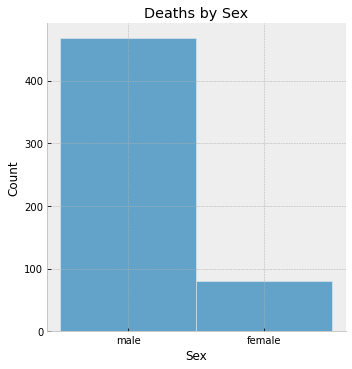

<Figure size 432x288 with 0 Axes>

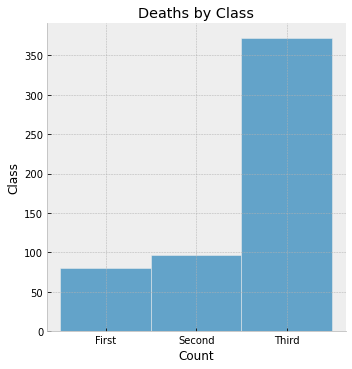

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.displot(data=df_titanic_deaths, x='sex', fill=True)
ax.set(xlabel='Sex', ylabel='Count', title='Deaths by Sex')
plt.figure();
ax = sns.displot(data=df_titanic_deaths, x='class', fill=True)
ax.set(xlabel='Count', ylabel='Class', title='Deaths by Class')
plt.figure();

In [ ]:
df_titanic_deaths_by_class=df_titanic_deaths[['sex', 'class']]
df_titanic_deaths_by_class.head(200)



,sex,class
0,male,Third
4,male,Third
5,male,Third
6,male,First
7,male,Third
...,...,...
312,female,Second
313,male,Third
314,male,Second
317,male,Second


In [ ]:

df_titanic_deaths_by_class=df_titanic_deaths_by_class.groupby(['sex','class']).size().reset_index(name="Count")
df_titanic_deaths_by_class.head(100)

,sex,class,Count
0,female,First,3
1,female,Second,6
2,female,Third,72
3,male,First,77
4,male,Second,91
5,male,Third,300


Text(0.5, 0.98, 'Titanic Deaths Count By Class and Gender')

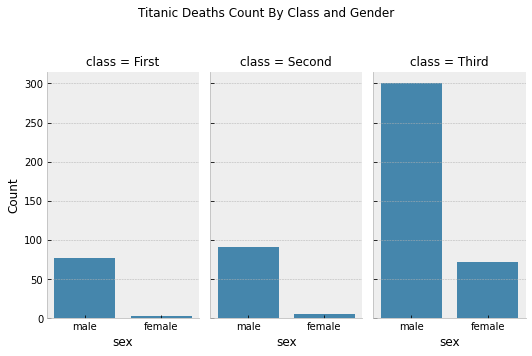

In [ ]:
g = sns.FacetGrid(df_titanic_deaths_by_class, col="class", height=5, aspect=.5)
g.map(sns.barplot, "sex", "Count", order=["male", "female"])
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Titanic Deaths Count By Class and Gender')

In [ ]:
df_alive_death=df_titanic[['survived','sex', 'class']]
df_alive_death['survived'] = df_alive_death['survived'].replace([0],'Death')
df_alive_death['survived'] = df_alive_death['survived'].replace([1],'Alive')


C:\Users\gabri\AppData\Local\Temp/ipykernel_22580/4004413710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alive_death['survived'] = df_alive_death['survived'].replace([0],'Death')
C:\Users\gabri\AppData\Local\Temp/ipykernel_22580/4004413710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alive_death['survived'] = df_alive_death['survived'].replace([1],'Alive')


In [ ]:
df_alive_death=df_alive_death.groupby(['survived']).size().reset_index(name="Death Count")
df_alive_death.head(100)


,survived,Death Count
0,Alive,342
1,Death,549


<AxesSubplot:ylabel='Death Count'>

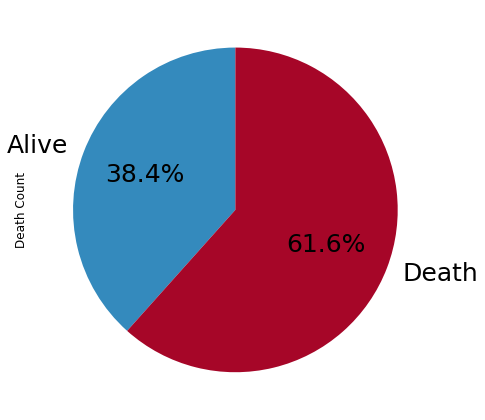

In [ ]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_alive_death.plot(kind='pie', y = 'Death Count', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_alive_death['survived'], legend = False, fontsize=25)
 

In [ ]:
df_titanic_deaths_by_sex=df_titanic_deaths[['sex', 'class']]
df_titanic_deaths_by_sex=df_titanic_deaths_by_sex.groupby(['sex']).size().reset_index(name="Count")
df_titanic_deaths_by_sex.head(100)


,sex,Count
0,female,81
1,male,468


<AxesSubplot:ylabel='Count'>

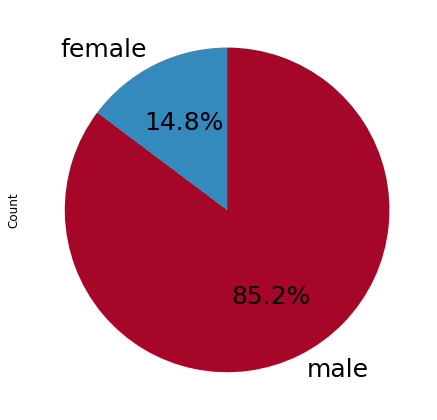

In [ ]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_titanic_deaths_by_sex.plot(kind='pie', y = 'Count', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_titanic_deaths_by_sex['sex'], legend = False, fontsize=25)